# Linear regression via statistics method

In statistics, linear regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables.
The case of one independent variable is called simple linear regression.
For more than one independent variable, the process is called multiple linear regression.

## $y = m_{1}*x_{1}+m_{2}*x_{2}+----+m_{n}*x_{n}+b$

## $ y=mx+b $
## $ m=\frac{\sum_{i=1}^{m}(x-\bar x)(y-\bar y)}{\sum_{i=1}^{m}(x-\bar x)^2} $
## $ b=\bar y-m\bar x $ 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data=pd.read_csv('salary.csv')
data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [4]:
data.drop(['age','company_change','type'],axis=1,inplace=True)

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [8]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


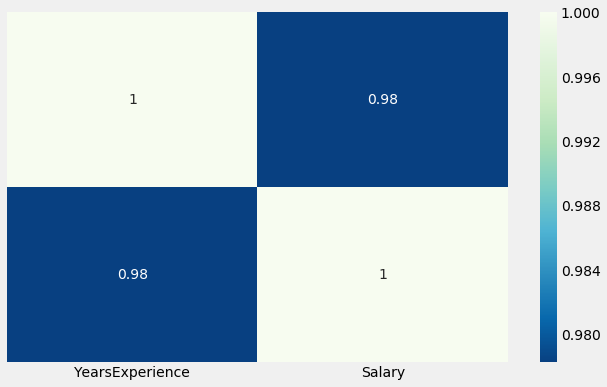

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),yticklabels=False,annot=True,cmap='GnBu_r')

<Figure size 720x432 with 0 Axes>

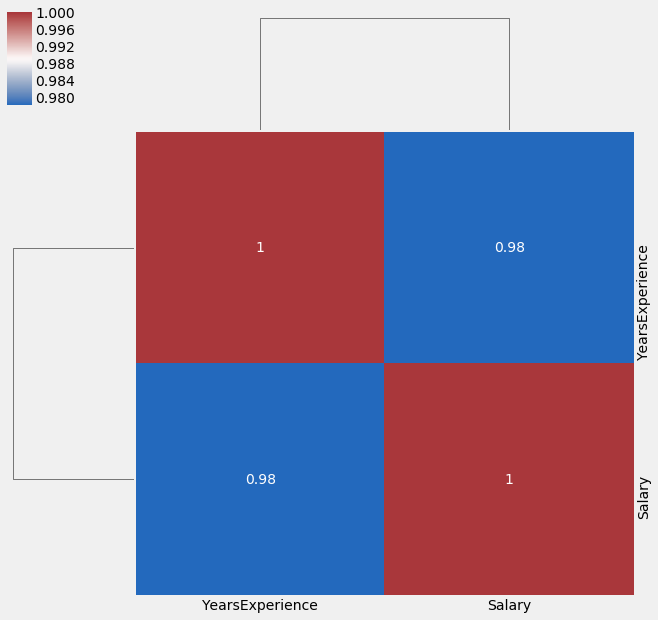

In [11]:
plt.figure(figsize=(10,6))
sns.clustermap(data.corr(),cmap='vlag',annot=True)

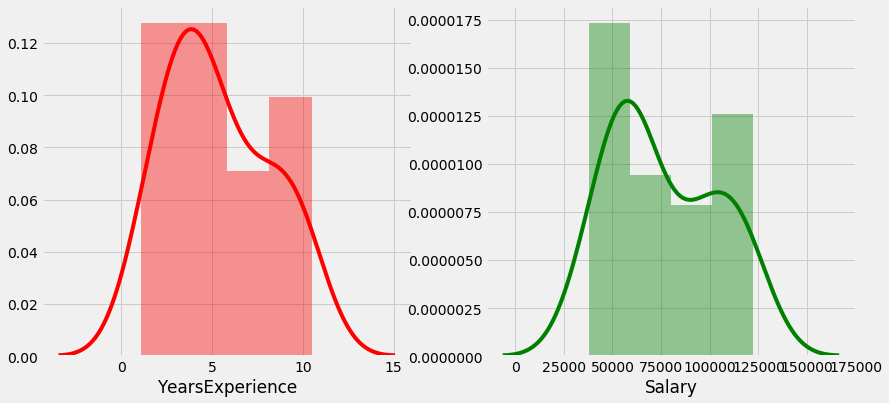

In [16]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.distplot(data['YearsExperience'],color='r')
plt.subplot(122)
sns.distplot(data['Salary'],color='g')

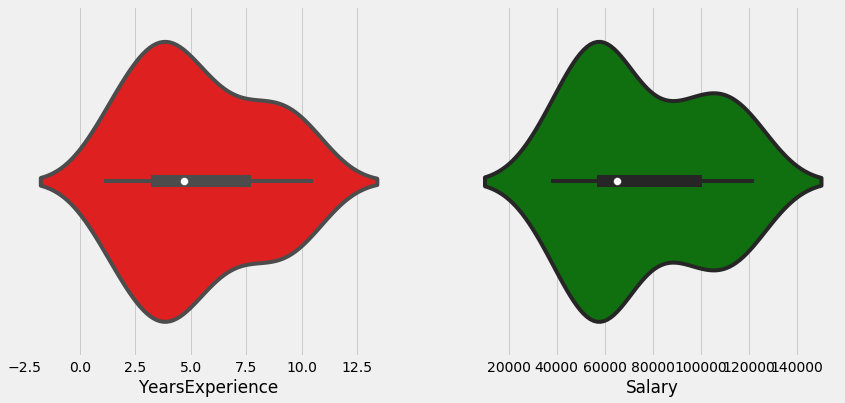

In [17]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(data['YearsExperience'],color='r')
plt.subplot(122)
sns.violinplot(data['Salary'],color='g')

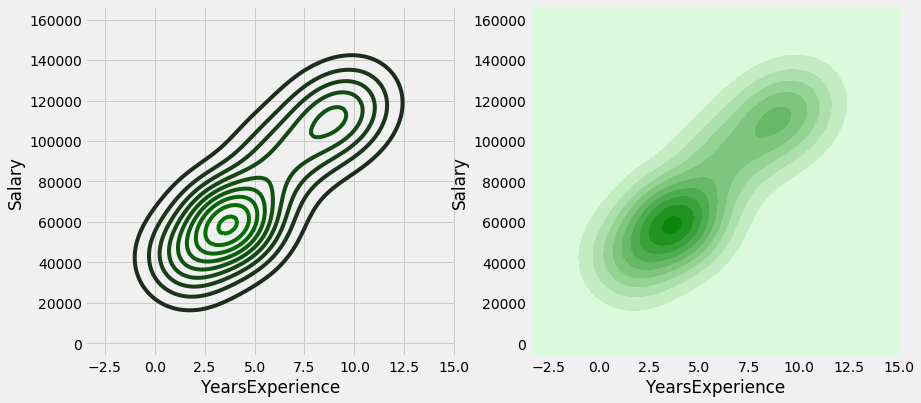

In [18]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.kdeplot(data['YearsExperience'],data['Salary'],color='g')
plt.subplot(122)
sns.kdeplot(data['YearsExperience'],data['Salary'],color='g',shade=True)

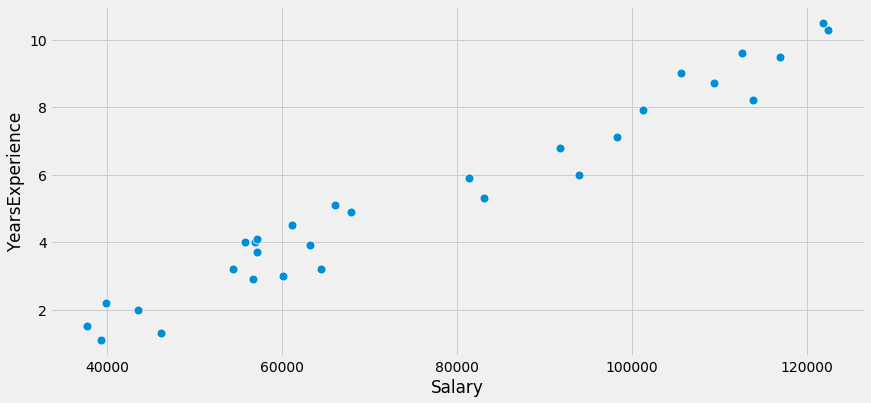

In [20]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Salary',y='YearsExperience',data=data,s=80)

<Figure size 936x432 with 0 Axes>

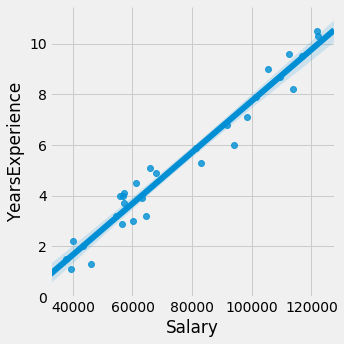

In [21]:
plt.figure(figsize=(13,6))
sns.lmplot(x='Salary',y='YearsExperience',data=data)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x=np.array(data['Salary'])
y=np.array(data['YearsExperience'])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)

## $ y=mx+b $
## $ m=\frac{\sum_{i=1}^{m}(x-\bar x)(y-\bar y)}{\sum_{i=1}^{m}(x-\bar x)^2} $
## $ b=\bar y-m\bar x $ 

In [43]:
a=x_train-x_train.mean()
c=y_train-y_train.mean()
d=sum(a*c)
e=sum(a*a)
m=d/e
b=y_train.mean()-m*x_train.mean()
print(f"slope is {m}")
print(f"bias is {b}")

slope is 9.89988894644093e-05
bias is -2.26884764507607


In [44]:
y_pred=m*x_test+b

In [45]:
print(y_pred)
print(y_test)

[1.62606566 3.38210796 3.68593556 3.3698321  7.46007022 4.45693891
 9.79634501 8.1836531 ]
[ 1.1  4.1  3.   4.   7.1  4.9 10.5  9. ]


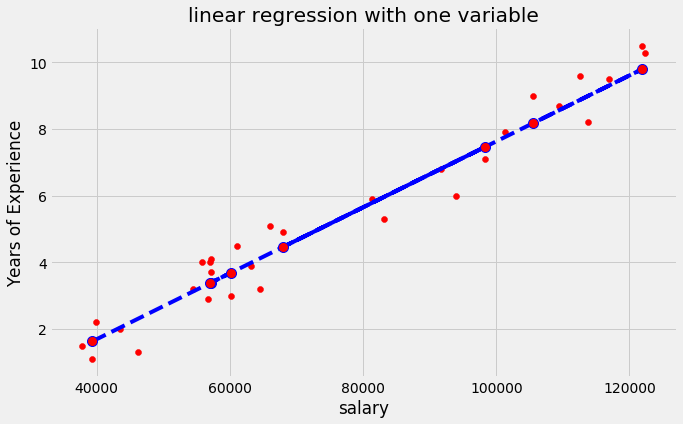

In [46]:
plt.figure(figsize=(10,6))
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("salary")
plt.ylabel("Years of Experience")
plt.title("linear regression with one variable")
plt.show()

In [47]:
from sklearn.metrics import explained_variance_score

In [49]:
explained_variance_score(y_test,y_pred)*100

96.04279582812163